# Text Extraction


## Library Imports

In [3]:
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

# Import other libraries
import nltk 
import numpy as np
import pandas as pd
import tika

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [4]:
from keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

Using TensorFlow backend.


In [5]:
from importlib import reload
reload(pdf2text)

<module 'libraries.pdf2text' from '/Users/Polina/Google Drive/Uni/MASTER/SoSe 2019/Text, Web and Social Media Analytics/datascience_project/libraries/pdf2text.py'>

In [7]:
dataset = pdf2text.get_dataset()

2019-06-23 18:31:40,098 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar to /var/folders/x4/3xn9_d5d6yg57jq706n4zyp80000gq/T/tika-server.jar.
2019-06-23 18:32:18,347 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar.md5 to /var/folders/x4/3xn9_d5d6yg57jq706n4zyp80000gq/T/tika-server.jar.md5.
2019-06-23 18:32:18,961 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2019-06-23 18:32:37,452 [MainThread  ] [WARNI]  Tika server returned status: 415
2019-06-23 18:32:40,985 [MainThread  ] [WARNI]  Tika server returned status: 422


In [8]:
dataset.keys()

dict_keys(['0chain', 'opmarket', '1x2Coin', '1World', 'opbusiness', 'oceanprotocol'])

In [9]:
len(dataset)

6

In [10]:
pdf2text.WHITE_PAPER_DIR

'/Users/Polina/Google Drive/Uni/MASTER/SoSe 2019/Text, Web and Social Media Analytics/datascience_project/white-papers'

In [11]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True)



[nltk_data] Downloading package punkt to /Users/Polina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Polina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Polina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Polina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Cleaning: 0chain
Cleaning: opmarket
Cleaning: 1x2Coin
Cleaning: 1World
Cleaning: opbusiness
Cleaning: oceanprotocol
Done!


## Corpus without labels

In [12]:
keys = []

for key in corpora.keys():
    keys.append(key)

In [13]:
only_text = []

for key in keys:
    only_text.append(corpora[key])

## Spacy - Entity Detection

In [14]:
#Entity detection
from spacy.lang.en import English
import spacy

nlp = spacy.load('en_core_web_sm')


text = only_text[0]
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)


today DATE
today DATE
today DATE
daily DATE
first ORDINAL
minutes TIME
seconds TIME
second ORDINAL
billion CARDINAL
today DATE
two CARDINAL
four years DATE
today DATE
today DATE
first ORDINAL
second ORDINAL
second ORDINAL
second ORDINAL
two CARDINAL
three CARDINAL
today DATE
second ORDINAL
second ORDINAL
today DATE
today DATE
first ORDINAL
one CARDINAL
long lines hours TIME
one CARDINAL
second ORDINAL
two CARDINAL
one CARDINAL
artist million CARDINAL
thousand CARDINAL
three CARDINAL
second ORDINAL
one CARDINAL
today DATE
two CARDINAL
one CARDINAL
one CARDINAL
two CARDINAL
one CARDINAL
one CARDINAL
one CARDINAL
years DATE
first ORDINAL
years DATE
july DATE
february DATE
two CARDINAL
first ORDINAL
two CARDINAL
two CARDINAL
two CARDINAL
two CARDINAL
one CARDINAL
two CARDINAL
first ORDINAL
two CARDINAL
one CARDINAL


## Word2Vec

In [15]:
with open('text.txt', 'w') as f:
    for i in range(6):
        f.write("%s\n" % only_text[i])

In [16]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim.models.word2vec import Text8Corpus

In [17]:
model = Word2Vec(only_text, min_count = 2)

In [18]:
X = model[model.wv.vocab]

In [19]:
pca = PCA(n_components=4)
result = pca.fit_transform(X)

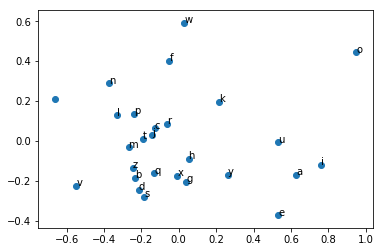

In [20]:
pyplot.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0], result[i,1]))
pyplot.show()

In [21]:
w2v_model2 = Word2Vec(Text8Corpus('text.txt'), size =100, window=5, min_count=150, workers=2)
print(w2v_model2.wv.most_similar)

<bound method WordEmbeddingsKeyedVectors.most_similar of <gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x1a3a0d3630>>


In [22]:
w2v_model2.wv.most_similar(['protocol'])

[('network', 0.9997021555900574),
 ('ocean', 0.9996883869171143),
 ('data', 0.9996845722198486),
 ('service', 0.9996814727783203),
 ('tokens', 0.9990384578704834),
 ('world', 0.9985746145248413)]

## Keras

In [23]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [24]:
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

In [25]:
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in only_text]
print(encoded_docs)

[[33, 41, 35, 33, 31, 19, 35, 36, 22, 15, 40, 43, 32, 31, 41, 18, 47, 17, 9, 3, 15, 24, 37, 2, 42, 46, 29, 33, 21, 10, 22, 43, 2, 8, 46, 43, 33, 14, 2, 48, 4, 33, 8, 14, 31, 31, 31, 13, 5, 31, 38, 13, 31, 32, 31, 9, 36, 19, 21, 19, 41, 33, 7, 19, 14, 31, 19, 31, 38, 13, 31, 19, 13, 5, 31, 2, 25, 13, 33, 24, 12, 25, 40, 43, 42, 46, 5, 46, 14, 20, 39, 22, 2, 19, 45, 31, 20, 25, 35, 47, 16, 38, 23, 38, 11, 28, 32, 38, 29, 30, 10, 35, 32, 49, 47, 8, 2, 26, 40, 43, 22, 47, 19, 23, 9, 41, 8, 46, 8, 46, 42, 31, 32, 26, 48, 30, 48, 12, 8, 21, 9, 37, 30, 2, 5, 19, 22, 44, 39, 23, 31, 15, 22, 36, 35, 42, 38, 43, 11, 28, 32, 23, 47, 30, 5, 47, 32, 23, 48, 20, 43, 4, 3, 22, 5, 18, 15, 20, 33, 28, 35, 26, 25, 24, 49, 46, 13, 12, 25, 15, 13, 47, 10, 35, 24, 38, 31, 24, 6, 25, 36, 5, 37, 19, 4, 43, 28, 39, 7, 26, 35, 40, 41, 31, 21, 19, 19, 7, 8, 21, 49, 7, 18, 7, 40, 48, 9, 24, 45, 4, 47, 36, 17, 30, 31, 2, 46, 21, 22, 4, 7, 22, 30, 33, 25, 4, 37, 21, 35, 25, 18, 40, 1, 1, 42, 32, 3, 11, 42, 26, 31,

In [26]:
# pad documents to a max length of 4 words
max_length = 4  # could have been larger!
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[31 19 28 31]
 [ 4 30 36 43]
 [37  9 49 20]
 [ 9 32 10 12]
 [15 10 15 33]
 [47  9 43 17]]


In [27]:
# define the model
model = Sequential()
#model.input_shape
#model.output_shape

In [28]:
# Embedding(input_dim, output_dim, input_length)
model.add(Embedding(vocab_size, 50, input_length=max_length))
model.input_shape  # is the input_length
model.output_shape  # is the output_dim

Instructions for updating:
Colocations handled automatically by placer.


(None, 4, 50)

In [29]:
model.add(Flatten())
model.input_shape  # is the input_length
model.output_shape

(None, 200)

In [30]:
model.add(Dense(1, activation='sigmoid'))

In [31]:
# compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [32]:
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 50)             2500      
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [34]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

ValueError: Input arrays should have the same number of samples as target arrays. Found 6 input samples and 10 target samples.

## Rankings Playground

In [41]:
rankings = pd.read_csv("rankings.csv")
market_cap = rankings['Market Cap']

TypeError: unsupported operand type(s) for /: 'str' and 'int'

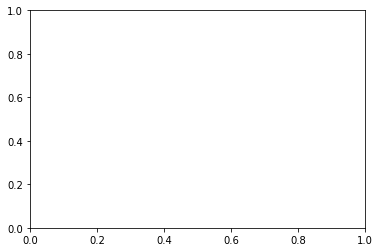

In [43]:
import seaborn as sns, numpy as np
ax = sns.distplot(market_cap)

In [6]:
## Code to convert pdfs to text

# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

WHITE_PAPER_DIR = os.path.join(ROOT_DIR, "white-papers")

TXT_DIR = os.path.join(ROOT_DIR, "white-papers")

# Import own functions
from libraries import corpus
from libraries import pdf2text

# Import other libraries
from tikapp import TikaApp
from tika import parser
import io

data = {} #define the dataset dictionary

for file in os.listdir(WHITE_PAPER_DIR): #iterating over all the files in the directory
    filename = os.fsdecode(file)
    parsed = parser.from_file(os.path.join(WHITE_PAPER_DIR, str(filename))) #parsing the texts within the file
    filename = filename.split(".")[0]
    data[filename] = parsed
    #text = parsed['content']
    #filename = filename.split(".")[0] #splitting the name to remove the .pdf
    #dataset = parser.from_file(os.path.join(WHITE_PAPER_DIR, str(filename))) #add file to the dictionary

2019-06-12 18:51:08,815 [MainThread  ] [WARNI]  Tika server returned status: 415
2019-06-12 18:51:11,266 [MainThread  ] [WARNI]  Tika server returned status: 422


In [284]:
files = []

for file in os.listdir(WHITE_PAPER_DIR): #iterating over all the files in the directory
    filename = os.fsdecode(file)
    filename = filename.split(".")[0] #splitting the name to remove the .pdf
    files.append(filename)

In [287]:
#dataset = get_dataset()
all_text = []
dataset = []
for f in files: 
    all_text = data[f]
    dataset.append(all_text)

In [321]:
text2 = []
for i in range(len(dataset)):
    print(dataset[i].keys())

dict_keys(['status', 'content', 'metadata'])
dict_keys(['status', 'content', 'metadata'])
dict_keys(['status'])
dict_keys(['status', 'content', 'metadata'])
dict_keys(['status', 'content', 'metadata'])
dict_keys(['status', 'content', 'metadata'])
dict_keys(['status'])
dict_keys(['status', 'content', 'metadata'])


In [304]:
text2 = []
for i in range(len(text)):
    with open('text.txt', 'w') as f:
        for i in range(8):
            f.write("%s\n" % text[i])

In [311]:
for file in papers:
    for i in range(len(os.listdir(WHITE_PAPER_DIR))):
        all_text = dataset[file]
        text1 = all_text['content']
        text[i] = all_text
    ##dataset[all_text] = all_text['content']

TypeError: list indices must be integers or slices, not str

In [70]:
text = "Vectorization Feature Engineering (TF-IDF). When we classify text, we end up with text snippets matched with their respective labels. But we can’t simply use text strings in our machine learning model; we need a way to convert our text into something that can be represented numerically just like the labels (1 for positive and 0 for negative) are. Classifying text in positive and negative labels is called sentiment analysis. So we need a way to represent our text numerically. One tool we can use for doing this is called Bag of Words. BoW converts text into the matrix of occurrence of words within a given document. It focuses on whether given words occurred or not in the document, and it generates a matrix that we might see referred to as a BoW matrix or a document term matrix. We can generate a BoW matrix for our text data by using scikit-learn‘s CountVectorizer. In the code below, we’re telling CountVectorizer to use the custom spacy_tokenizer function we built as its tokenizer, and defining the ngram range we want.N-grams are combinations of adjacent words in a given text, where n is the number of words that incuded in the tokens. for example, in the sentence “Who will win the football world cup in 2022?” unigrams would be a sequence of single words such as “who”, “will”, “win” and so on. Bigrams would be a sequence of 2 contiguous words such as “who will”, “will win”, and so on. So the ngram_range parameter we’ll use in the code below sets the lower and upper bounds of the our ngrams (we’ll be using unigrams). Then we’ll assign the ngrams to bow_vector."

from gensim.summarization import summarize
print(summarize(text))

But we can’t simply use text strings in our machine learning model; we need a way to convert our text into something that can be represented numerically just like the labels (1 for positive and 0 for negative) are.
BoW converts text into the matrix of occurrence of words within a given document.
